### Libraries Import

In [42]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### Data Collection

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/m-mahdavi/teaching/refs/heads/main/datasets/mnist.csv')
df

,id,class,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,31953,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,34452,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,60897,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,36953,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1981,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,25268,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3996,6473,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3997,5821,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3998,1751,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Data Exploration

In [3]:
df.head()

,id,class,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,31953,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,34452,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,60897,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,36953,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1981,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Columns: 786 entries, id to pixel784
dtypes: int64(786)
memory usage: 24.0 MB


In [5]:
df.isnull()

,id,class,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
df.hist

<bound method hist_frame of          id  class  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0     31953      5       0       0       0       0       0       0       0   
1     34452      8       0       0       0       0       0       0       0   
2     60897      5       0       0       0       0       0       0       0   
3     36953      0       0       0       0       0       0       0       0   
4      1981      3       0       0       0       0       0       0       0   
...     ...    ...     ...     ...     ...     ...     ...     ...     ...   
3995  25268      1       0       0       0       0       0       0       0   
3996   6473      6       0       0       0       0       0       0       0   
3997   5821      7       0       0       0       0       0       0       0   
3998   1751      9       0       0       0       0       0       0       0   
3999  56752      2       0       0       0       0       0       0       0   

      pixel8  ...  pixel775  pixel7

<Axes: >

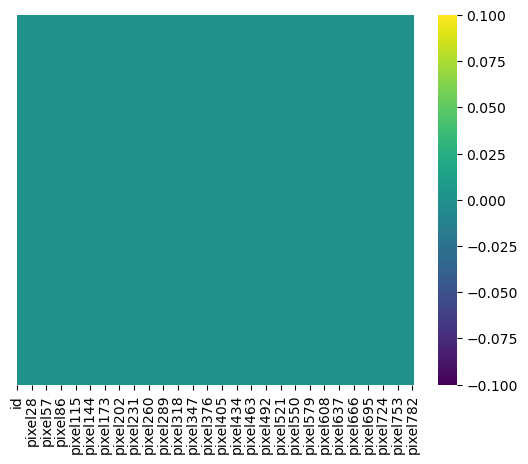

In [10]:
sns.heatmap(df.isnull(), yticklabels=False, cbar= True, cmap='viridis')

### Data Preprocessing

In [27]:
df['class'].unique()

array([5, 8, 0, 3, 2, 1, 6, 9, 4, 7], dtype=int64)

In [28]:
df.head()

,class,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Training and Splitting Data

In [30]:
X = df.drop('class', axis=1)
y = df['class']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

In [32]:
X_train.columns

Index(['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7',
       'pixel8', 'pixel9', 'pixel10',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=784)

### Model Training

In [35]:
model = LogisticRegression() #assigning a variable for logistic regression

In [36]:
model.fit(X_train, y_train) #fit the training variables

C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Model Evaluation

In [37]:
reg = LogisticRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1.0

In [48]:
model.score(X_train, y_train)

1.0

### Making Predictions

In [38]:
predictions = model.predict(X_test) # pass X-test while predicting on model.
predictions

array([7, 8, 5, 8, 7, 3, 5, 3, 1, 5, 9, 1, 2, 9, 9, 5, 1, 4, 8, 7, 2, 8,
       5, 8, 6, 9, 6, 3, 2, 8, 0, 8, 6, 9, 0, 2, 6, 1, 5, 1, 8, 0, 2, 5,
       6, 7, 3, 7, 5, 2, 1, 7, 4, 4, 0, 5, 8, 0, 4, 8, 2, 3, 3, 4, 9, 1,
       6, 4, 5, 9, 7, 2, 3, 0, 7, 5, 2, 3, 0, 8, 4, 5, 2, 7, 9, 2, 4, 9,
       6, 6, 1, 5, 0, 7, 7, 8, 5, 1, 2, 1, 0, 2, 8, 8, 8, 0, 0, 9, 7, 7,
       0, 5, 4, 3, 2, 5, 9, 3, 7, 8, 3, 4, 7, 5, 2, 4, 4, 9, 5, 6, 8, 8,
       4, 7, 8, 0, 9, 6, 4, 0, 7, 1, 2, 4, 6, 0, 7, 5, 5, 8, 2, 1, 1, 8,
       9, 2, 1, 8, 6, 8, 7, 8, 0, 5, 3, 9, 4, 8, 2, 3, 9, 6, 6, 6, 1, 7,
       1, 5, 2, 6, 2, 7, 8, 9, 0, 9, 2, 8, 1, 8, 5, 6, 4, 8, 3, 8, 6, 8,
       7, 3, 4, 3, 5, 6, 0, 4, 9, 0, 6, 3, 3, 6, 0, 0, 0, 1, 5, 1, 4, 4,
       8, 3, 1, 9, 5, 9, 2, 3, 7, 6, 6, 0, 9, 5, 9, 2, 6, 7, 4, 3, 9, 9,
       7, 1, 3, 9, 5, 9, 5, 5, 0, 0, 5, 6, 8, 6, 4, 7, 8, 5, 2, 2, 7, 8,
       0, 9, 0, 5, 0, 6, 6, 0, 7, 2, 9, 0, 7, 4, 5, 1, 6, 1, 4, 5, 2, 7,
       7, 1, 6, 5, 1, 8, 6, 1, 1, 1, 5, 7, 9, 3, 7,

In [39]:
y_test

821     7
2093    8
2332    3
792     8
1296    7
       ..
389     9
72      9
1419    5
1463    5
1320    7
Name: class, Length: 1000, dtype: int64

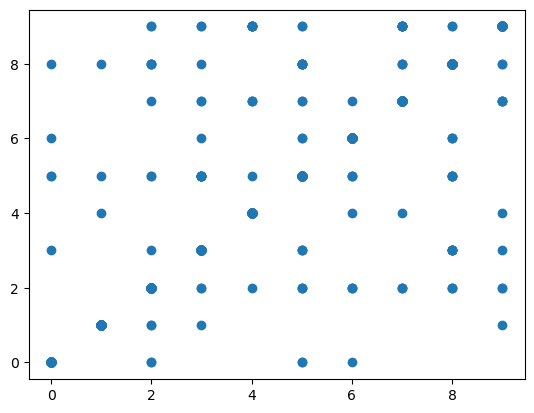

In [43]:
plt.scatter(y_test, predictions)

### Comparisions between the predictions and the y_test

In [45]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        87
           1       0.97      0.97      0.97       116
           2       0.85      0.87      0.86       107
           3       0.87      0.82      0.84        94
           4       0.95      0.87      0.91        94
           5       0.78      0.79      0.79       101
           6       0.93      0.91      0.92       100
           7       0.88      0.86      0.87       107
           8       0.83      0.83      0.83       110
           9       0.76      0.87      0.81        84

    accuracy                           0.87      1000
   macro avg       0.87      0.87      0.87      1000
weighted avg       0.88      0.87      0.87      1000



In [47]:
print(confusion_matrix(y_test, predictions))

[[ 82   0   0   1   0   2   1   0   1   0]
 [  0 113   0   0   1   1   0   0   1   0]
 [  2   2  93   1   0   2   0   1   4   2]
 [  0   1   2  77   0   8   1   2   1   2]
 [  0   0   1   0  82   1   0   3   0   7]
 [  2   0   3   3   0  80   2   2   7   2]
 [  1   0   3   0   1   3  91   1   0   0]
 [  0   0   3   0   1   0   0  92   3   8]
 [  0   0   3   6   0   5   3   0  91   2]
 [  0   1   2   1   1   0   0   4   2  73]]
